In [1]:
from simulations.pixel_array import pixelarrayQPC
from optimization.trajectory_optimization import trajectory_func_to_optimize
from optimization.cma2 import optimize_cma
from lossfunctions.staircasiness import staircasiness
from datahandling.datahandling import datahandler
import numpy as np
from functools import partial
from multiprocessing import cpu_count

D:\Anaconda\envs\qcodes\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
start=-7
stop=2
steps=100

# Parameters for QPC
disorder=0.3
outer_gates=-13
B_field=0
energy=3

# Parameters for optimization algorithm
# bounds=(-1,1)
# pfactor=0.001

# Initialize loss function
stairs=staircasiness(delta=0.05,last_step=20)

# Set common voltage sweep
common_voltages=np.linspace(start,stop,steps)


# Initialize QPC instance and set parameters
QPC=pixelarrayQPC(plot=False)

QPC.U0=disorder
QPC.energy=energy
QPC.V1=outer_gates
QPC.V11=outer_gates
QPC.phi=B_field

dat=datahandler('fourier_modes',QPC=QPC)

In [3]:
order=2
start_point=np.zeros(shape=(order,8)).ravel()
kwargs={'common_mode':common_voltages,'QPC_instance':QPC,'order':order,'loss_function':stairs.stairLossFunk2,'bounds':(-9,4),'pfactor':0.001,'num_cpus':cpu_count()}
actual_func_to_minimize=partial(trajectory_func_to_optimize,**kwargs)
result=optimize_cma(actual_func_to_minimize,dat,start_point,maxfevals=99999,sigma=0.5,stop_time=100)

data saved to:
C:/Users/Torbjørn/Google Drev/UNI/MastersProject/EverythingkwantRL/saved_data/outcmaes/97/
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=521678, Thu Jan  6 12:11:40 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 2.326301745546333e+01 1.0e+00 4.69e-01  5e-01  5e-01 2:51.1
termination on timeout=100 (Thu Jan  6 12:14:46 2022)
final/bestever f-value = 2.231551e+01 2.231551e+01
incumbent solution: [-0.57261121  0.02200727 -0.02960057  0.31584662 -0.0056501  -0.46030546
 -0.06587463 -0.07473941 ...]
std deviations: [0.47216747 0.46957821 0.46118944 0.46559942 0.4689747  0.47194245
 0.46272799 0.46767643 ...]


In [4]:
import json
with open(dat.data_path+f'outcmaes/{result[2]}/datadict.txt','rb') as file:
    results_dict=json.load(file)


In [5]:
losses=[]
xs=[]
voltages=[]
staircases=[]
times=[]
for key in range(len(results_dict['measurements'])):
    losses.append(results_dict['measurements'][str(key)]['loss'])
    voltages.append(results_dict['measurements'][str(key)]['voltages'])
    staircases.append(results_dict['measurements'][str(key)]['staircase'])
    xs.append(results_dict['measurements'][str(key)]['x'])
    times.append(results_dict['measurements'][str(key)]['time_for_voltages'])

KeyError: 'time_for_voltages'

[0.15008162976187203, -0.785523897421022, -0.01633656649652914, -0.2657604289116673, 0.9332555916921349, -0.0251362883737215, 0.516700669847356, -0.4505470615753353, 0.29847494216545933, -0.5796739001666811, -0.5064599029530745, -0.01989517725272947, -0.09098091377947376, 0.06650164296475604, -0.27417146776474666, 0.7359643866229805, 0.44137527113987857, -0.3571312073856009, -0.16519509337349073, -0.223544716304335, -0.15977865625429455, 0.03043236320086081, 0.3516727135853663, 0.5364398473308762]


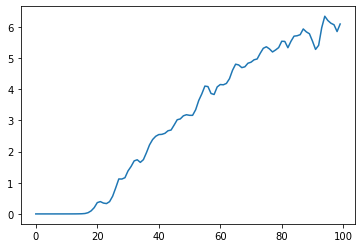

In [ ]:
import matplotlib.pyplot as plt
plt.plot(staircases[np.argmin(losses)])
print(xs[np.argmin(losses)])


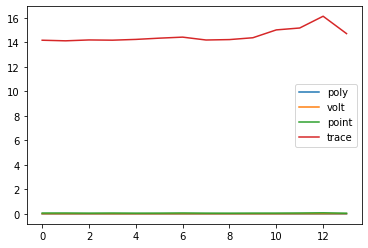

In [ ]:
times=np.array(times)
poly_time=times[:,0]
volt_time=times[:,1]
new_point_time=times[:,2]
trace_time=times[:,3]

plt.figure()
plt.plot(poly_time,label='poly')
plt.plot(volt_time,label='volt')
plt.plot(new_point_time,label='point')
plt.plot(trace_time,label='trace')
plt.legend()

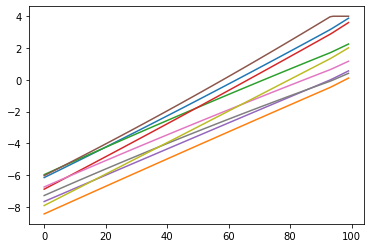

In [ ]:
array_voltages=np.array(voltages[np.argmin(losses)])
plt.figure()
for i in range(9):
    plt.plot(array_voltages[:,i])